# MWE: Global MAD test

In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
# import cmocean
from mcsm_benchs.SignalBank import SignalBank
from mcsm_benchs.Benchmark import Benchmark
from src.utilities.spatstats_utils import compute_global_mad_test
from src.utilities.utils import one_sided_spectrogram_and_zeros

In [2]:
# rng
np.random.seed(0) 

# signal parameters
SNRin = 10
N = 2**8
# Nsub=N//2
sbank = SignalBank(N=N,Nsub=128)
s = sbank.signal_linear_chirp()

noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)

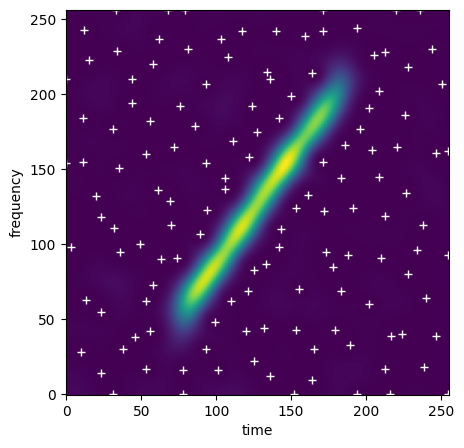

In [3]:
Nfft = 2*N
S, ceros,_ = one_sided_spectrogram_and_zeros(signal)
fig, ax = plt.subplots(1,1,figsize = (5,5))
ax.imshow((S), origin='lower')
ax.plot(ceros[:,1],ceros[:,0],'w+')
ax.set_xlabel('time'); ax.set_ylabel('frequency');
plt.show()

In [4]:
# Run the test with the signal
output_dict = compute_global_mad_test(signal, statistic='Frs', alpha=0.05, pnorm=2, return_values=True)
result = output_dict['reject_H0']

[Text(0.5, 0, 'r_max'), Text(0, 0.5, 'S(r_max)')]

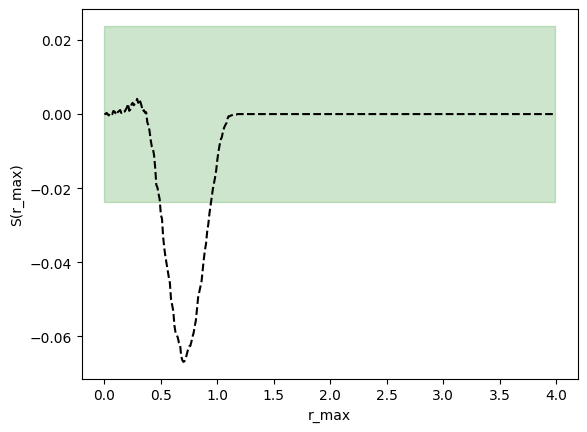

In [5]:
fig, ax = plt.subplots(1,1)
ax.plot(output_dict['radius'],output_dict['Sexp'].T-output_dict['S0'].T,'k--')
# ax.plot(output_dict['radius'],output_dict['Sm'].T-output_dict['S0'].T,'g--')
ax.fill_between(output_dict['radius'], -output_dict['tsim'][output_dict['k']], output_dict['tsim'][output_dict['k']], color='g', alpha=.2)
ax.set(xlabel='r_max',ylabel='S(r_max)')

In [6]:
# Run the test with noise only to check the difference
noise = np.random.randn(N)
output_dict = compute_global_mad_test(noise, statistic='Frs', alpha=0.05, pnorm=2, return_values=True)
result = output_dict['reject_H0']

[Text(0.5, 0, 'r_max'), Text(0, 0.5, 'S(r_max)')]

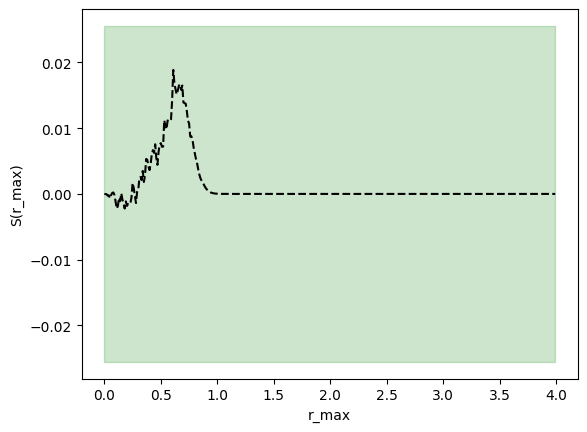

In [7]:
fig, ax = plt.subplots(1,1)
ax.plot(output_dict['radius'],output_dict['Sexp'].T-output_dict['S0'].T,'k--')
# ax.plot(output_dict['radius'],output_dict['Sm'].T-output_dict['S0'].T,'g--')
ax.fill_between(output_dict['radius'], -output_dict['tsim'][output_dict['k']], output_dict['tsim'][output_dict['k']], color='g', alpha=.2)
ax.set(xlabel='r_max',ylabel='S(r_max)')